# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
#1
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
os.chdir(r'C:\Users\yshai\Desktop\undergrad_ml_assignments\data')
 
data = pd.read_csv('airbnb_NYC.csv', encoding = 'latin1')
data["Price"] = (data["Price"].astype(str).str.replace(",", "", regex=False).str.strip())

data["Price"] = pd.to_numeric(data["Price"], errors="coerce")

data
# I chose to only replace the commas and coerce any other value within the price data. 
# It did not seem like there were any missing data points, so I turned the objects into floats to let price be used as a numeric instead of a string.

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


In [11]:
data['Price'].isna().sum()

np.int64(0)

In [12]:
#2
df = pd.read_csv('mn_police_use_of_force.csv')
df['subject_injury'].value_counts(dropna=False)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

In [13]:
nan_prop = df['subject_injury'].isna().mean()
print(nan_prop)

0.7619342359767892


In [ ]:
filtered_df = df.dropna(subset=['subject_injury'])
pd.crosstab(filtered_df['force_type'], filtered_df['subject_injury'], dropna=False)


subject_injury,No,Yes
force_type,,
Baton,0,2
Bodily Force,1093,1286
Chemical Irritant,131,41
Firearm,2,0
Gun Point Display,33,44
Improvised Weapon,34,40
Less Lethal Projectile,1,2
Police K9 Bite,2,44
Taser,150,172


With the missing values, the firearm encounters appear to have unusually skewed injury reporting to other uses of force. For example, using a taser or bodily force did not seem to have as many missing values, but rows with extremely low data seemed to have many missing values which caused unrealistic distributions.

In [15]:
df = df.fillna('Missing')
df.head()
df['subject_injury'].value_counts()
df.isna().sum()



response_datetime    0
problem              0
is_911_call          0
primary_offense      0
subject_injury       0
force_type           0
force_type_action    0
race                 0
sex                  0
age                  0
type_resistance      0
precinct             0
neighborhood         0
dtype: int64

In [16]:
#3
df2 = pd.read_csv('metabric.csv')
df2.head()
df2['Overall Survival Status'].value_counts()

Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64

In [17]:
if df2['Overall Survival Status'].dtype == object:
    df2['Overall Survival Status'] = (
        df2['Overall Survival Status']
        .str.contains('LIVING')
        .astype(int)
    )
df2['Overall Survival Status'].value_counts()

Overall Survival Status
0    768
1    575
Name: count, dtype: int64

In [18]:
#4
X = pd.read_csv('airbnb_NYC.csv', encoding = 'latin1')
X['Review Scores Rating'].isna().sum()

np.int64(8323)

In [19]:
median_score = X['Review Scores Rating'].median()

X['Review_Scores_Rating_imputed'] = (
    X['Review Scores Rating']
    .fillna(median_score)
)
X.head(20)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Review_Scores_Rating_imputed
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0,96.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [20]:
#1
!{sys.executable} -m pip install xlrd
sdf = pd.read_excel('GSAF5.xls')
sdf.head() # this command works as it pandas reads the excel file. There needs to be the module xlrd installed first though.

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#2
sdf = sdf.dropna(axis=1, how="all")
sdf.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. An observation is one single instance of a unit in a dataset where all relevant variables are recorded.

In [ ]:
#4
pd.to_numeric(sdf["Year"], errors="coerce")
sdf.shape

(7074, 23)

In [23]:
#4 Cont
new_sdf = sdf[sdf['Year'] > 1940]
new_sdf.shape

(5514, 23)

<Axes: xlabel='Year'>

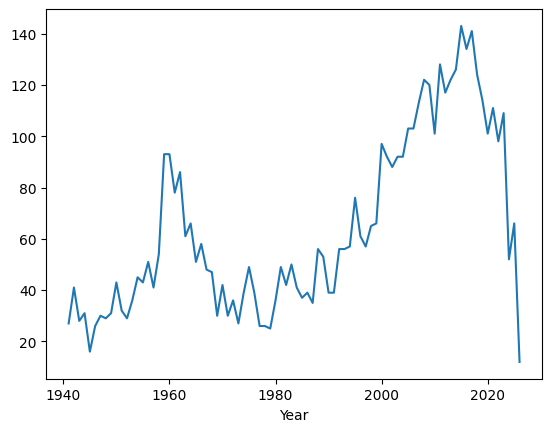

In [24]:
#4 Cont
attacks_per_year = new_sdf.groupby("Year").size()
attacks_per_year.plot()


It appears that the number of shark attacks is increasing over the years after 1940

In [25]:
#5
sdf['Age'].unique()
# turn everything to numbers i guess? Drop anything with words? Im not too sure.

array(['13', '?', '39', '11', '27', '12', '26', '56', '55', '24', '25',
       '61', '40', '14', '50+', '54', '48', '57', '8', '63', '9', '19',
       '7', '85', '69', '18', '66', '21', '37', '16', '20', '42', '45',
       '30', '30+', '40+', '29', 35, 58, 29, 24, 20, 55, 17, 12, 37, 36,
       23, 40, 28, 69, 48, '60+', 57, 45, 61, 27, 38, 16, 68, 33, 30, 15,
       41, 14, 43, 26, 'Middle age', 18, 21, 49, 25, 46, 19, 65, 64, nan,
       '46', '32', '10', '64', '62', '22', '15', '52', '44', '47', '59',
       '50', '34', '38', '30s', '20/30', '35', '65', '20s', '77', '60',
       '49', '!2', '73', '50s', '58', '67', '17', '6', '41', '53', '68',
       '43', '51', '31', 39, 51, 10, 13, 60, '40s', 62, 'teen', 8, 22, 32,
       56, 'Teen', 42, 50, 'M', 9, 31, 11, 34, '!6', '!!', 47, 7, 71, 59,
       53, 54, 75, '45 and 15', 73, 52, 70, 4, 63, 44, '28 & 22',
       '22, 57, 31', '60s', "20's", 67, 74, '9 & 60', 'a minor', 6, 3, 82,
       '40?', 66, 72, '23', '36', '71', '70', '18 month

In [26]:
sdf["Age_clean"] = pd.to_numeric(sdf["Age"], errors="coerce")
sdf.dropna(subset=["Age_clean"], inplace=True)
sdf["Age_clean"] = sdf["Age_clean"].astype(int)
sdf["Age_clean"].isna().sum() 


np.int64(0)

<Axes: xlabel='Age_clean', ylabel='Count'>

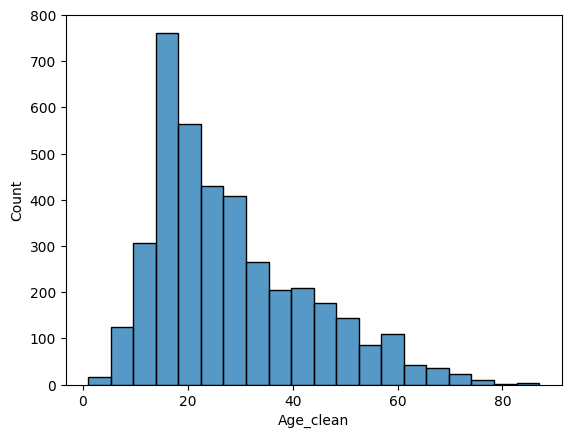

In [27]:
sns.histplot(sdf["Age_clean"], bins=20)

In [28]:
#6
sdf['Type'].value_counts()

Type
Unprovoked             3268
Provoked                310
Invalid                 230
Watercraft               44
Sea Disaster             41
Questionable             19
unprovoked                1
?                         1
Under investigation       1
Name: count, dtype: int64

In [29]:
sdf["Type_clean"] = sdf["Type"].str.strip().str.title()
def clean_type(type):
    if type in ["Provoked", "Unprovoked"]:
        return type
    else:
        return "Unknown"
sdf['Type_clean'] = sdf['Type_clean'].apply(clean_type)
sdf['Type_clean'].value_counts()


Type_clean
Unprovoked    3269
Unknown        346
Provoked       310
Name: count, dtype: int64

In [30]:
#7
sdf['Fatal Y/N'].value_counts()

Fatal Y/N
N          2993
Y           684
UNKNOWN      10
 N            6
F             4
2017          1
M             1
Name: count, dtype: int64

In [31]:
sdf["Fatal_clean"] = sdf["Fatal Y/N"].str.strip().str.title()
def clean_fatal(f_type):
    if f_type in ["Y", "N"]:
        return f_type
    else:
        return "Unknown"
sdf['Fatal_clean'] = sdf['Fatal_clean'].apply(clean_fatal)
sdf['Fatal_clean'].value_counts()


Fatal_clean
N          2999
Y           684
Unknown     242
Name: count, dtype: int64

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. The paper describes how tidy tables, a very important form of data cleaning , opens the doors for a very easy way of handling data, analyzing the data, and communicating the data.
2. The "tidy data standard" intends to allow someone handling the data the ability to start exploring the data and perform simple analysis without having to worry about extensive data cleaning.
3. The first quote refers are how happy families are all alike whereas unhappy families are unhappy in their own ways. The second quote refers to how knowing what the observations and variables are may seem clear, however, being able to define those concepts that work for many datasets is challenging.
4. Values are defined as either numbers or strings that belong to a variable and an observation. A variable is defined as containing all values that measure the same underlying attribute across units, and an observation is defined as containing all values measured on the same unit across attributes.
5. Tidy data is defined as a standard way of mapping the actual meaning of a dataset to its structure. It has three key characteristics: Each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
6. The five most common problems with messy datasets include: Column headers are values, not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and  a single observational unit is stored in multiple tables. Table four is messy because the variables form both rows and columns, and the column headers are values, not variable names. Melting a dataset means reshaping the data so that the columns now represent values of the variables as rows.
7. Table 11 is messy because the columns are not different variables. Secondly, rows do not correspond to a single observation. Table 12(a) is considered "molten" and becuase the day columns from Table 11 were transformed into rows and each row now corresponds to a single observation. Table 12(b) is considered tidy because each variable forms a column and each row now represents a single observation.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [32]:
#1
import matplotlib.pyplot as plt
fgdf = pd.read_csv('ForeignGifts_edu.csv')
fgdf_pos = fgdf[fgdf["Foreign Gift Amount"] > 0]
fgdf_pos.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


Text(0.5, 0, 'log10(Foreign Gift Amount in USD)')

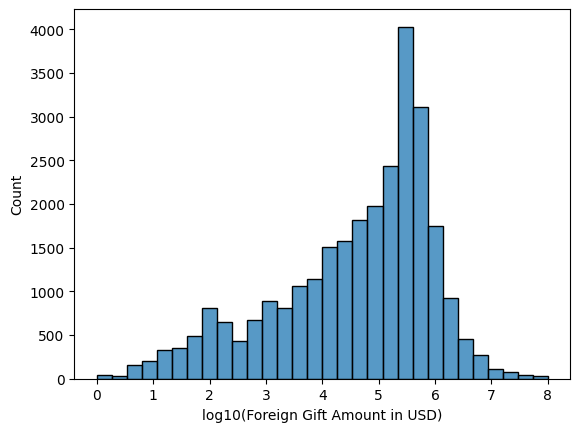

In [33]:
#2
sns.histplot(np.log10(fgdf_pos["Foreign Gift Amount"]), bins=30)
plt.xlabel("log10(Foreign Gift Amount in USD)")

Because the foreign gift amounts were heavily skewed, I plotted based on a log10 scale to view the results. This plot shows that most gifts fall in the moderate range being slightly on the higher side.

In [34]:
#3
fgdf["Gift Type"].value_counts().to_frame(name="Count")

,Count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [35]:
#3 Cont
gift_counts = fgdf["Gift Type"].value_counts()
gift_props = gift_counts / gift_counts.sum()
print(gift_props)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


In [64]:
#4
top15_count = (fgdf.groupby("Country of Giftor").size().sort_values(ascending=False).head(15))
top15_count.to_frame(name=" Count per gifting country")


,Count per gifting country
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [65]:
top15_amount = (
    fgdf.dropna(subset=["Country of Giftor", "Foreign Gift Amount"])
        .groupby("Country of Giftor")["Foreign Gift Amount"]
        .sum()
        .sort_values(ascending=False)
        .head(15)
)
top15_amount.to_frame(name="Total Gift Amount per gifting country")


,Total Gift Amount per gifting country
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [37]:
# 5
inst_totals = (fgdf_pos.groupby("Institution Name")["Foreign Gift Amount"].sum())
inst_totals.sort_values(ascending=False).head(15).to_frame(
    name="Total Foreign Gift Amount in USD")


,Total Foreign Gift Amount in USD
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


Text(0.5, 0, 'log10(Total Foreign Gift Amount in USD)')

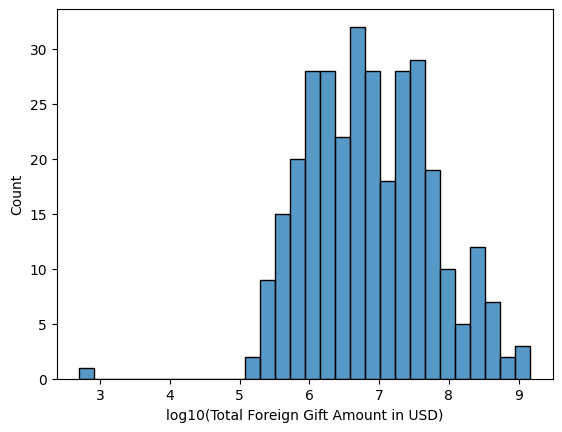

In [38]:
#5
sns.histplot(np.log10(inst_totals), bins=30)
plt.xlabel("log10(Total Foreign Gift Amount in USD)")

In [39]:
#6
gifter_totals = (fgdf_pos.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False))
gifter_totals.head()


Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [40]:
#1
ccdf = pd.read_csv('college_completion.csv')
#2
ccdf.shape # There are 3798 rows and 63 columns in the dataset

(3798, 63)

In [41]:
#2 Cont
ccdf.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [42]:
#3
pd.crosstab(ccdf['control'], ccdf['level'], dropna=False)

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


There are more public 2-year universities than 4-year which make sense due to more community colleges existing than public 4-year. There are many more private non-profit 4 year universities than there areprivate non-profit 2 year universities. The private for-profit category seems somewhat evenly spread.

<Axes: xlabel='grad_100_value', ylabel='Density'>

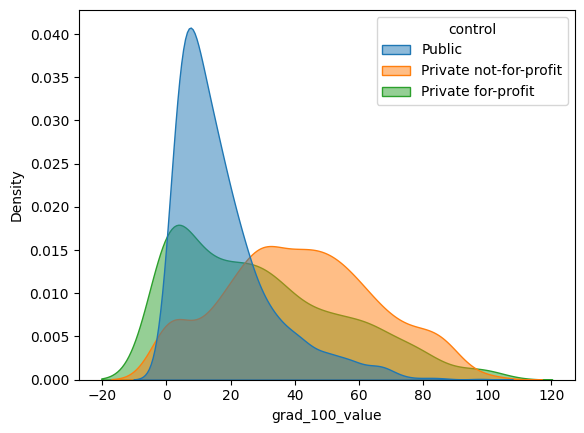

In [43]:
#4
sns.kdeplot(data=ccdf, x='grad_100_value', hue='control', fill=True, common_norm=False, alpha=0.5)

**#4** Private not-for-profit institutions appear to have the most favorable graduation rates.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

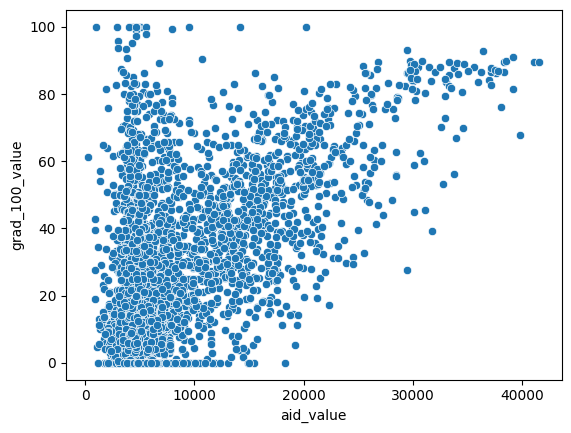

In [44]:
#6
sns.scatterplot(data=ccdf, x='aid_value', y='grad_100_value')

In [45]:
df_xy = ccdf[["aid_value", "grad_100_value"]].dropna()
df_xy.cov() 


,aid_value,grad_100_value
aid_value,4.358513e+07,88610.483169
grad_100_value,8.861048e+04,543.211540


In [46]:
df_xy.corr()

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


Based on the covariance, it seems that institutions with higher aid values tend to have higher graduation rates. Based on the correlation, it seems that there is a positive and linear relationship between the two variables. This means that higher aid is positive correlated and leads to higher graduation rates.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

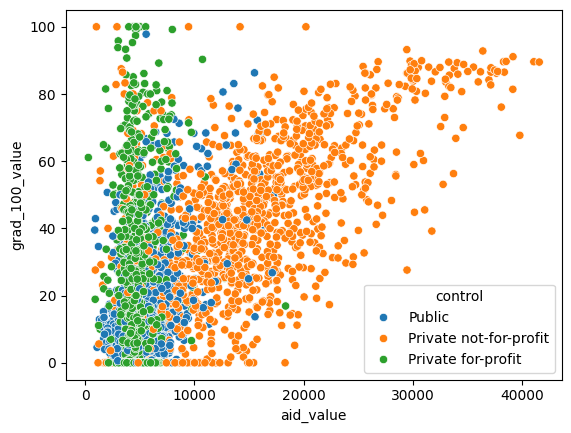

In [47]:
sns.scatterplot(data=ccdf, x='aid_value', y='grad_100_value', hue='control')

Private not-for-profit institutions appear to have the strongest positive correlation between aid value and graduation rates.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

In [48]:
#1-4
import numpy as np

def m(X):
    X = np.asarray(X, dtype=float)
    return X.mean()

def s2(X):
    X = np.asarray(X, dtype=float)
    return np.mean((X - m(X))**2)   

def cov(X, Y):
    X = np.asarray(X, dtype=float)
    Y = np.asarray(Y, dtype=float)
    return np.mean((X - m(X)) * (Y - m(Y)))  # divide by N
X = np.array([1, 2, 5, 7, 9], dtype=float)
Y = np.array([3, 4, 4, 8, 10], dtype=float)

a = 2.5
b = -1.7


left1  = m(a + b*X)
right1 = a + b*m(X)


left2  = cov(X, X)
right2 = s2(X)


left3  = cov(X, a + b*Y)
right3 = b * cov(X, Y)


left4  = cov(a + b*X, a + b*Y)
right4 = (b**2) * cov(X, Y)

print("1:", left1, right1, np.isclose(left1, right1))
print("2:", left2, right2, np.isclose(left2, right2))
print("3:", left3, right3, np.isclose(left3, right3))
print("4:", left4, right4, np.isclose(left4, right4))


1: -5.659999999999999 -5.66 True
2: 8.959999999999999 8.959999999999999 True
3: -12.851999999999999 -12.851999999999999 True
4: 21.848399999999998 21.848399999999998 True


5.  Yes for part 1 because the middle point moves in the same way as all the data, so the median changes the same way as the data. No for part 2 because the IQR measures spread, which scales by b, but this is unaffected by shifts.

In [49]:
#6
X = np.array([0, 4])
mean_X = np.mean(X)

# Part a
mean_X_squared = np.mean(X**2)
square_mean_X = mean_X**2

# Part a
mean_sqrt_X = np.mean(np.sqrt(X))
sqrt_mean_X = np.sqrt(mean_X)

print("m(X^2) =", mean_X_squared)
print("(m(X))^2 =", square_mean_X)

print("m(sqrt(X)) =", mean_sqrt_X)
print("sqrt(m(X)) =", sqrt_mean_X)

m(X^2) = 8.0
(m(X))^2 = 4.0
m(sqrt(X)) = 1.0
sqrt(m(X)) = 1.4142135623730951

































**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [50]:
#1
apdf = pd.read_csv('ames_prices.csv')
apdf.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


<Axes: xlabel='price', ylabel='Density'>

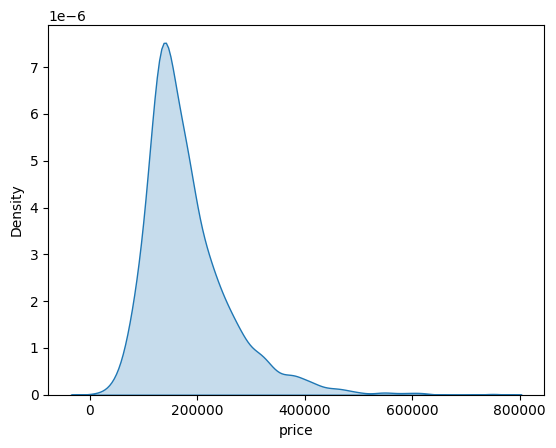

In [51]:
#2
sns.kdeplot(apdf["price"], fill=True)


In [52]:
#2 Cont
apdf["price"].describe().to_frame(name="Price Summary Statistics")

,Price Summary Statistics
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


Text(0.5, 0, 'price')

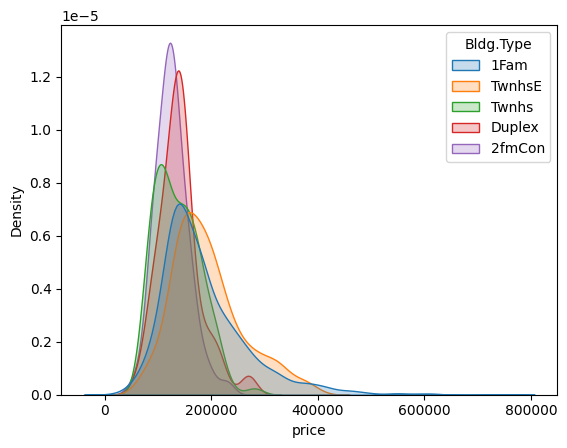

In [53]:
#2 Cont
sns.kdeplot(data=apdf, x="price", hue="Bldg.Type", fill=True, common_norm=False)
plt.xlabel("price")


In [54]:
#2 Cont
apdf.groupby("Bldg.Type")["price"].describe()


,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


On average, End Townhouses are the most expensive and single family homes have the highest variability.

<Axes: xlabel='price', ylabel='Proportion'>

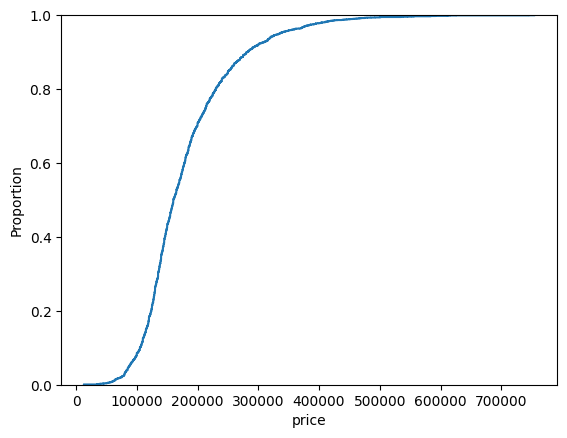

In [55]:
#3
sns.ecdfplot(data=apdf, x="price")

In [56]:
min = np.quantile(apdf["price"], 0)
q25 = np.quantile(apdf["price"], 0.25)
med = np.quantile(apdf["price"], 0.5)
q75 = np.quantile(apdf["price"], 0.75)
max = np.quantile(apdf["price"], 1)
print('min: ', min)
print('25th percentile: ', q25)
print('median: ', med)
print('75th percentile: ', q75)
print('max: ', max)

min:  12789
25th percentile:  129500.0
median:  160000.0
75th percentile:  213500.0
max:  755000


<Axes: xlabel='price'>

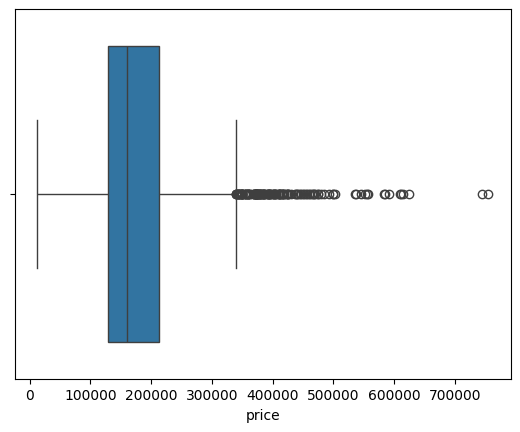

In [57]:
#4 
sns.boxplot(data=apdf, x="price")

Text(0.5, 1.0, 'Boxplot of Price by Building Type')

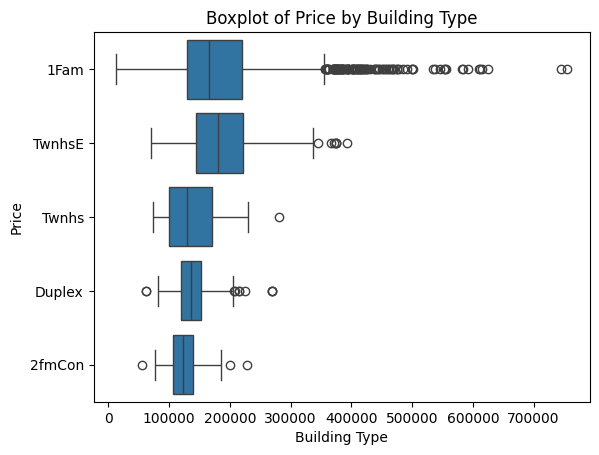

In [58]:
#4 Cont
sns.boxplot(data=apdf, x="price", y="Bldg.Type")
plt.xlabel("Building Type")
plt.ylabel("Price")
plt.title("Boxplot of Price by Building Type")


There are many outliers within the data, especially for single family homes. I noticed that Single Family homes also have the widest spread whereas a Duplex has the least spread. End townhomes also have the highest average cost whereas double family buildings have the smallest average cost.

In [59]:
#5
iqr = q75 - q25
upper_whisker = q75 + 1.5 * iqr
lower_whisker = q25 - 1.5 * iqr
apdf['price_is_outlier'] = ( (apdf['price'] < lower_whisker) |
(apdf['price'] > upper_whisker) ).astype(int)
apdf['price_is_outlier'].value_counts()

price_is_outlier
0    2793
1     137
Name: count, dtype: int64

In [60]:
#5 Cont
apdf['price_winsorize'] = ( (apdf['price'] < lower_whisker) * lower_whisker 
+ (apdf['price'] > upper_whisker) * upper_whisker 
+ (apdf['price'] >= lower_whisker) * (apdf['price'] <= upper_whisker) * apdf['price'])
apdf.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,price_is_outlier,price_winsorize
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,NaN,NaN,NaN,0,5,2010,WD,Normal,0,215000.0
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0,105000.0
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0,172000.0
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,NaN,NaN,NaN,0,4,2010,WD,Normal,0,244000.0
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0,189900.0


<Axes: xlabel='price_winsorize', ylabel='Density'>

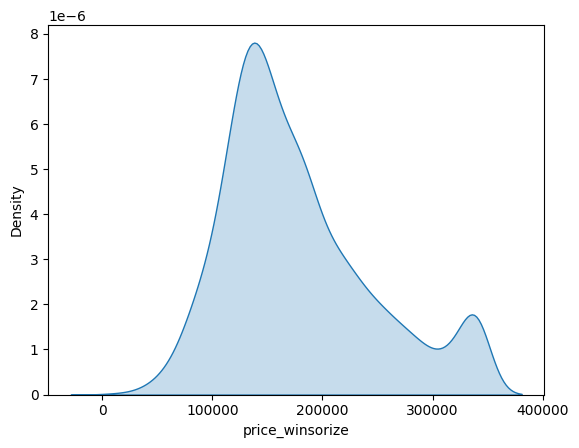

In [61]:
#5 Cont
sns.kdeplot(apdf["price_winsorize"], fill=True)

The right tail of the plot is shorter and less extreme as the KDE plot with the non-winsorized price. Secondly, the winsorized plot cuts off at 400000 rather than 600000 due to the extreme outliers in the previous plot. Overall, the winsorization of the price creates a more centered focus for the distribution without extremel values extending the tails of the plot.